In [16]:
import netCDF4
from google.colab import drive

drive.mount('/content/drive')

# !ls drive/MyDrive/data/MSM
# !mv 'drive/MyDrive/data/MSM/0707.nc' 'drive/MyDrive/data/MSM/20210707.nc'

filename1 = 'drive/MyDrive/data/MSM/p20200704.nc'
filename2 = 'drive/MyDrive/data/MSM/s20200704.nc'
filename3 = 'drive/MyDrive/data/MSM/div20200704.nc'
filename4 = 'drive/MyDrive/data/MSM/ra3hour_20200704.nc'
filename5 = 'drive/MyDrive/data/MSM/ra_test_20200704.nc'
nc_p = netCDF4.Dataset(filename1)
nc_s = netCDF4.Dataset(filename2)
nc_div = netCDF4.Dataset(filename3)
nc_ra = netCDF4.Dataset(filename4)
nc_test = netCDF4.Dataset(filename5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# nc_s.dimensions
# nc_p.variables.keys()
# nc_s.variables.keys()
nc_s.variables['r1h']
# nc_p['lat']
# nc_s['r1h']
# nc.history


<class 'netCDF4._netCDF4.Variable'>
int16 r1h(time, lat, lon)
    scale_factor: 0.006116208155
    add_offset: 200.0
    long_name: rainfall in 1 hour
    units: mm/h
    standard_name: rainfall_rate
unlimited dimensions: 
current shape = (24, 505, 481)
filling on, default _FillValue of -32767 used

In [ ]:
nc_p

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    history: created by create_1daync_msm_p.rb  2020-07-05
    dimensions(sizes): lon(241), lat(253), p(16), time(8)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 p(p), float32 time(time), float64 z(time, p, lat, lon), float64 w(time, p, lat, lon), int16 u(time, p, lat, lon), int16 v(time, p, lat, lon), int16 temp(time, p, lat, lon), int16 rh(time, p, lat, lon)
    groups: 

In [ ]:
nc_s

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    history: created by create_1daync_msm_s.rb  2020-07-05
    dimensions(sizes): lon(481), lat(505), time(24), ref_time(8)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 time(time), float32 ref_time(ref_time), int16 psea(time, lat, lon), int16 sp(time, lat, lon), int16 u(time, lat, lon), int16 v(time, lat, lon), int16 temp(time, lat, lon), int16 rh(time, lat, lon), int16 r1h(time, lat, lon), int16 ncld_upper(time, lat, lon), int16 ncld_mid(time, lat, lon), int16 ncld_low(time, lat, lon), int16 ncld(time, lat, lon), int16 dswrf(time, lat, lon)
    groups: 

In [3]:
nc_div

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): lon(241), lat(253), time(8)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 time(time), float64 div(time, lat, lon)
    groups: 

In [8]:
nc_ra

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): lon(241), lat(253), time(8)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 time(time), float64 ra(time, lat, lon)
    groups: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: The following kwargs were not used by contour: 'latlon'


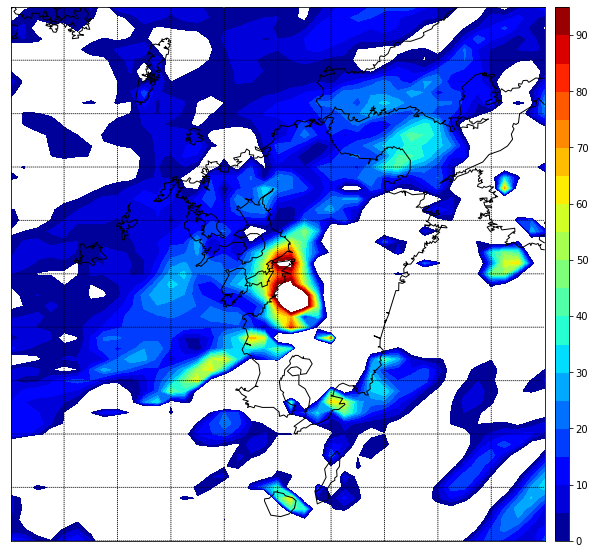

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# !pip3 install https://github.com/matplotlib/basemap/archive/master.zip
# !pip install pyproj==1.9.6
# !pip install git+https://github.com/matplotlib/basemap#subdirectory=packages/basemap
from mpl_toolkits.basemap import Basemap

# <time=0, p=0, lat=0, lon=0の時の>
# float(nc['temp'][0][:][0][0])
# len(temp)
# temp[0][0]

# <配列に>
var = np.array(nc_div['div'][7][:][:])
Lo = np.array(nc_div['lon'])
La = np.array(nc_div['lat'])
Lon, Lat = np.meshgrid(Lo, La)

#plot with Matplotlib
fig=plt.figure(figsize=(10,10))
#set the color interval
# interval=list(np.arange(50,100,5)) 
interval=list(np.arange(0,100,5)) 
# interval.insert(0,0.1)
#set colormap
cmap=cm.jet
cmap.set_under('w', alpha=0)

#set map
m=Basemap(
    projection='cyl',
    resolution='i',
    llcrnrlat=30,
    urcrnrlat=35,
    llcrnrlon=128,
    urcrnrlon=133
    )
m.drawcoastlines(color='black')
m.drawmeridians(np.arange(128,133,0.5))
m.drawparallels(np.arange(30,35,0.5))
x,y=m(Lon, Lat) #compute map projection
im=plt.contourf(x, y, var, interval, cmap=cmap, latlon=True)
# set colorbar
cb=m.colorbar(im, "right", size="2.5%")

plt.show()
plt.close()

In [ ]:
# lat=505, lon=481, time=24
# 引数はtime,lat,lonの順
ra_total = np.array(nc_s['r1h'][0][:][:])
each_ra = []

In [51]:
import sklearn

# 目的変数：降水量、説明変数：水蒸気収束量
# train t=1,2,3,4,5,6,7
# validation t=8

# ライブラリーのインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 学習データと評価データを作成
# y=f(x)
x=nc_p['rh'][0][0][:][:]
y=nc_p['temp'][0][0][:][:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#データを標準化
sc = StandardScaler()
sc.fit(x_train) #学習用データで標準化
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# ライブラリーのインポート
from sklearn.linear_model import LinearRegression

# スコア計算のためのライブラリ
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# モデルの学習
lr = LinearRegression()
lr.fit(x_train_std, y_train)

# 回帰　
pred_lr = lr.predict(x_test_std)

# 評価
# 決定係数(R2)
r2_lr = r2_score(y_test, pred_lr)

# 平均絶対誤差(MAE)
mae_lr = mean_absolute_error(y_test, pred_lr)

print("R2 : %.3f" % r2_lr)
print("MAE : %.3f" % mae_lr)

# 回帰係数
print("Coef = ", lr.coef_)
# 切片
print("Intercept =", lr.intercept_)

R2 : 0.912
MAE : 0.901
Coef =  [[-1.15241124  0.55434091  0.10885956 ...  0.79253421 -0.21205579
  -0.13602874]
 [-0.13090676 -0.75093517 -0.22329945 ...  0.56543628 -0.06813424
  -0.09110763]
 [-0.20773606  0.16113932 -1.10481562 ...  0.62320974 -0.29930145
  -0.03634826]
 ...
 [ 0.53292608  0.41361309 -0.17770437 ... -0.82618388 -0.30816335
   0.6909258 ]
 [ 0.50949609  0.41655295 -0.21787979 ... -0.35593519 -0.61718326
   0.39028469]
 [ 0.50773166  0.40050514 -0.24485261 ... -0.30053233  0.53073176
  -0.89792608]]
Intercept = [296.50036633 296.49802454 296.49648491 296.53264683 296.56897695
 296.54175524 296.41872707 296.40154531 296.33461664 296.30853348
 296.30591998 296.32143274 296.28644818 296.25521566 296.25773859
 296.23156486 296.1898525  296.14599243 296.11204291 296.08435543
 296.04093525 295.99786439 296.01428281 296.03625166 296.07114566
 296.10589733 296.14777788 296.1317476  296.1069065  296.12703814
 296.149007   296.14666521 296.13763443 296.10629841 296.09232529
 29